array([ True, False,  True, False])

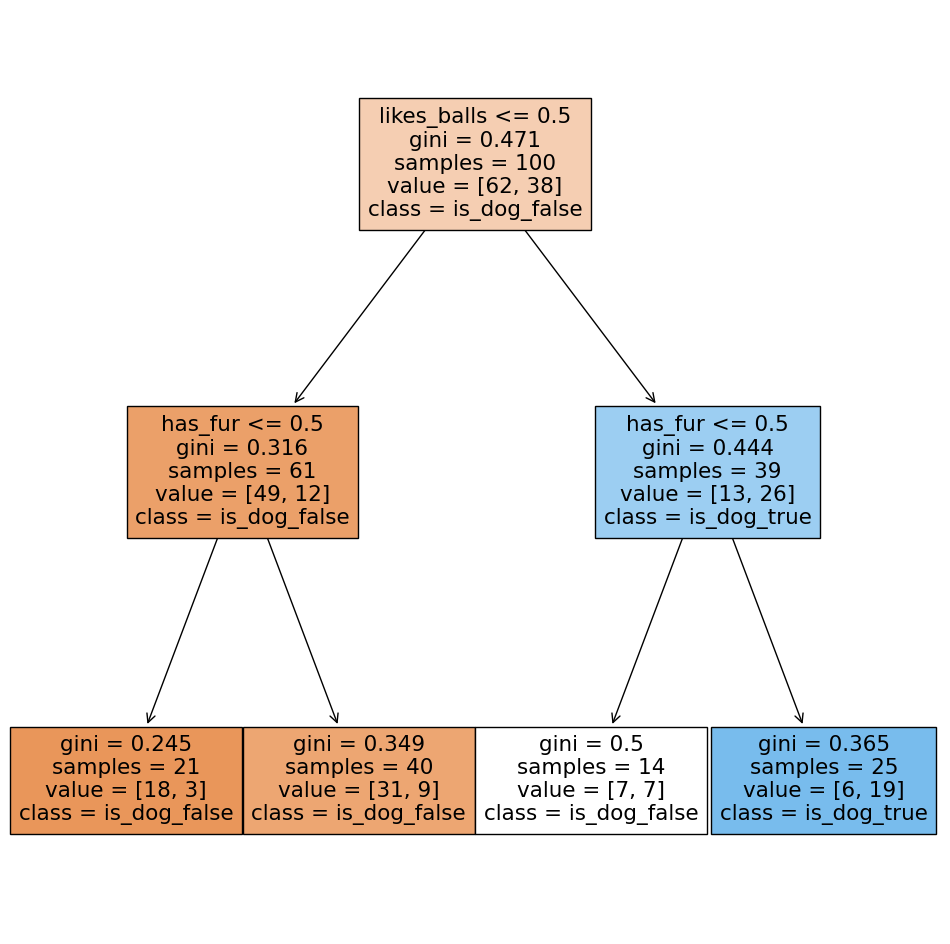

In [ ]:
import pandas as pd
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load all our training data and list the training features
all_data = pd.read_csv("pet_training.csv")
all_features = ['height', 'weight', 'has_fur', 'likes_belly_rubs', 'likes_balls']

# Bootstrapping: Randomly sample 100 rows of data and 2 features
sampled_data = resample(all_data, replace=True, n_samples=100)
sampled_features = random.sample(all_features, k=2)

print("Features used:")
print(sampled_features)

X = sampled_data[sampled_features]
y = sampled_data['is_dog']

# Train a decision tree on the sampled data
pet_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
pet_tree.fit(X, y)


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(pet_tree, feature_names=sampled_features, class_names=["is_dog_false", "is_dog_true"], filled=True)
plt.savefig('pet_tree.png')

print("Tree saved as tree.png")


test_data = pd.read_csv("pet_test.csv")

test_data['predictions'] = pet_tree.predict(test_data[sampled_features])

for index, row in enumerate(test_data.to_dict('records')):
  print(f"\n Row number {index}")
  for feature in row:
    if feature not in ['pet_type', 'is_dog']:
      print(f"{feature}: {row[feature]}")

In [2]:
def create_tree_and_save(itteration_number):
    sampled_data = resample(all_data, replace=True, n_samples=100)
    sampled_features = random.sample(all_features, k=2)

    X = sampled_data[sampled_features]
    y = sampled_data['is_dog']


    tree = DecisionTreeClassifier(max_depth=2, random_state=1)
    tree.fit(X, y)


    plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
    plot_tree(tree, feature_names=sampled_features, class_names=["is_dog_false", "is_dog_true"], filled=True)
    plt.savefig(f'trees/tree_{itteration_number}.png')

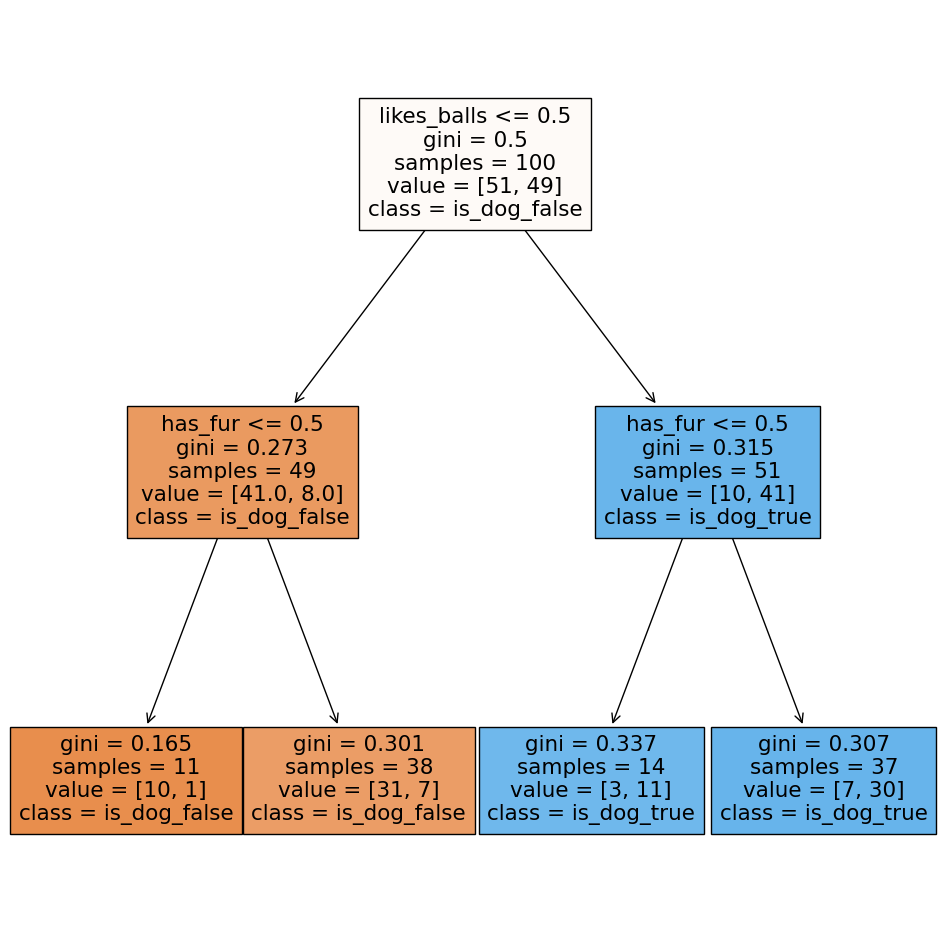

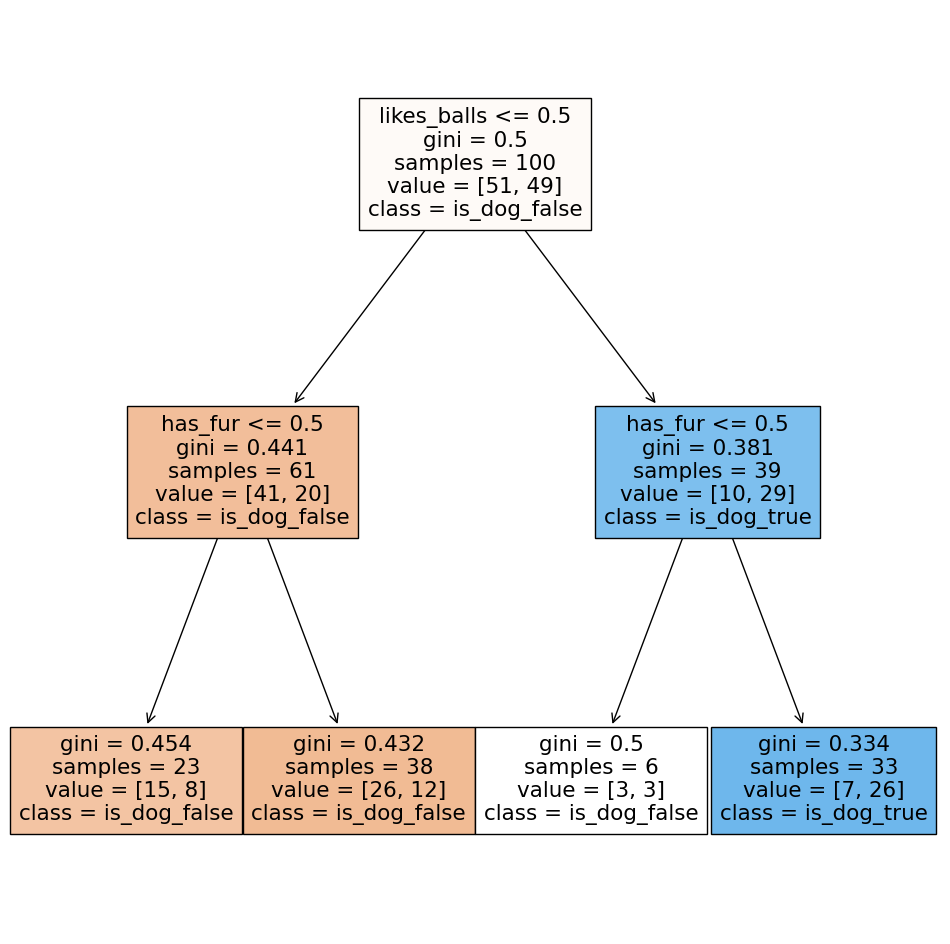

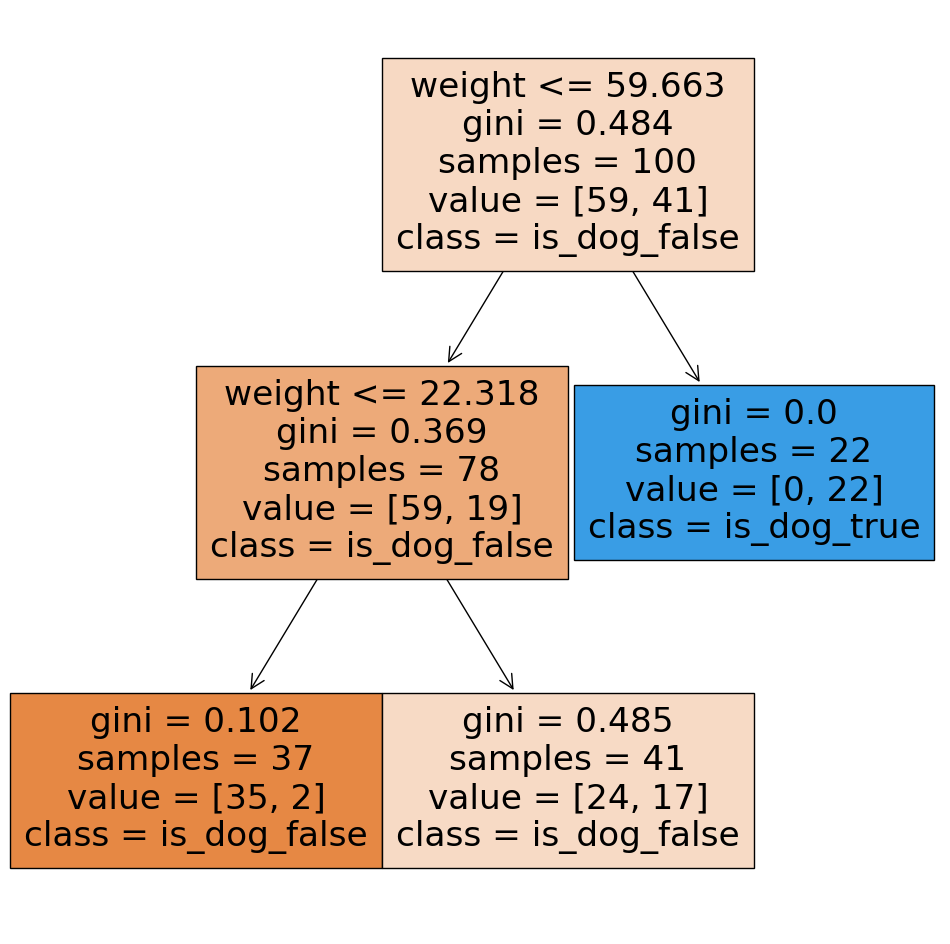

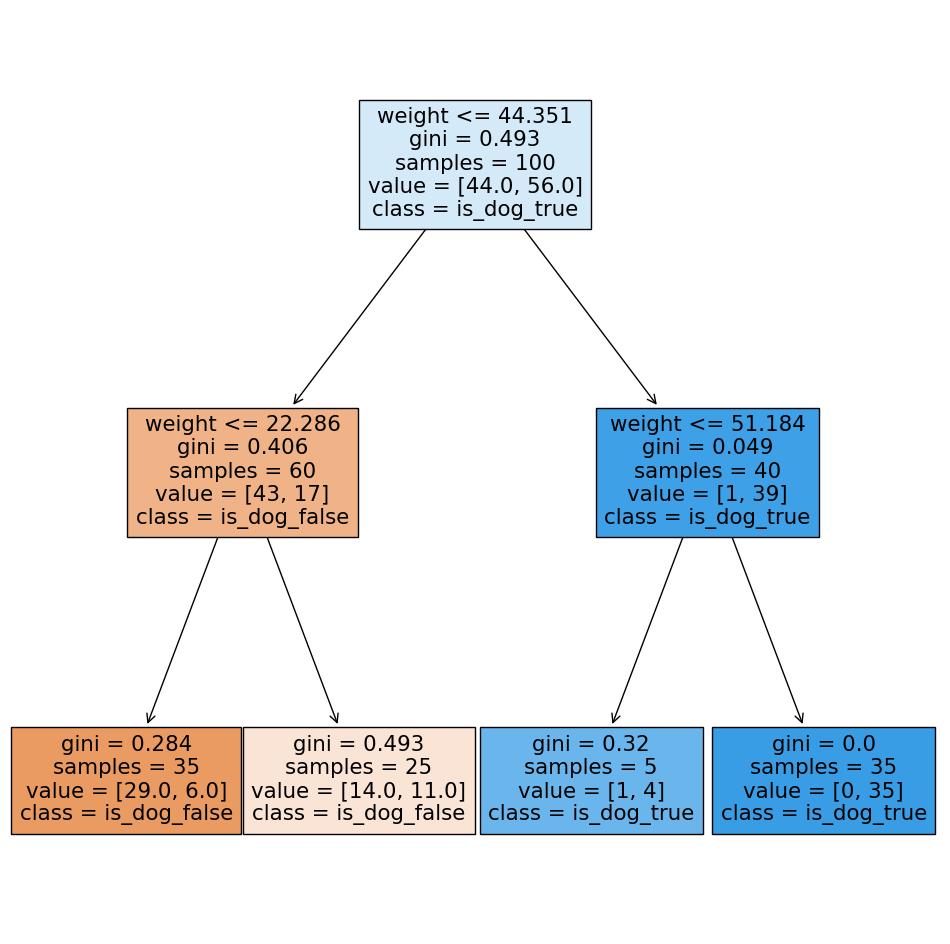

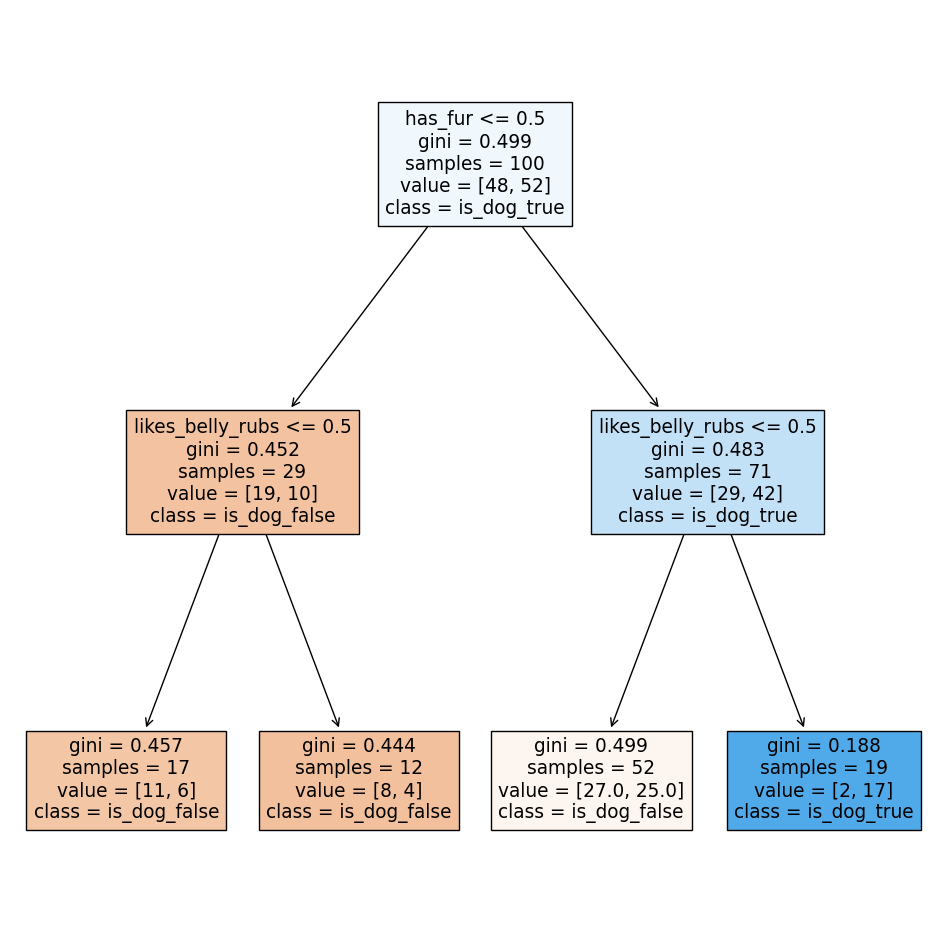

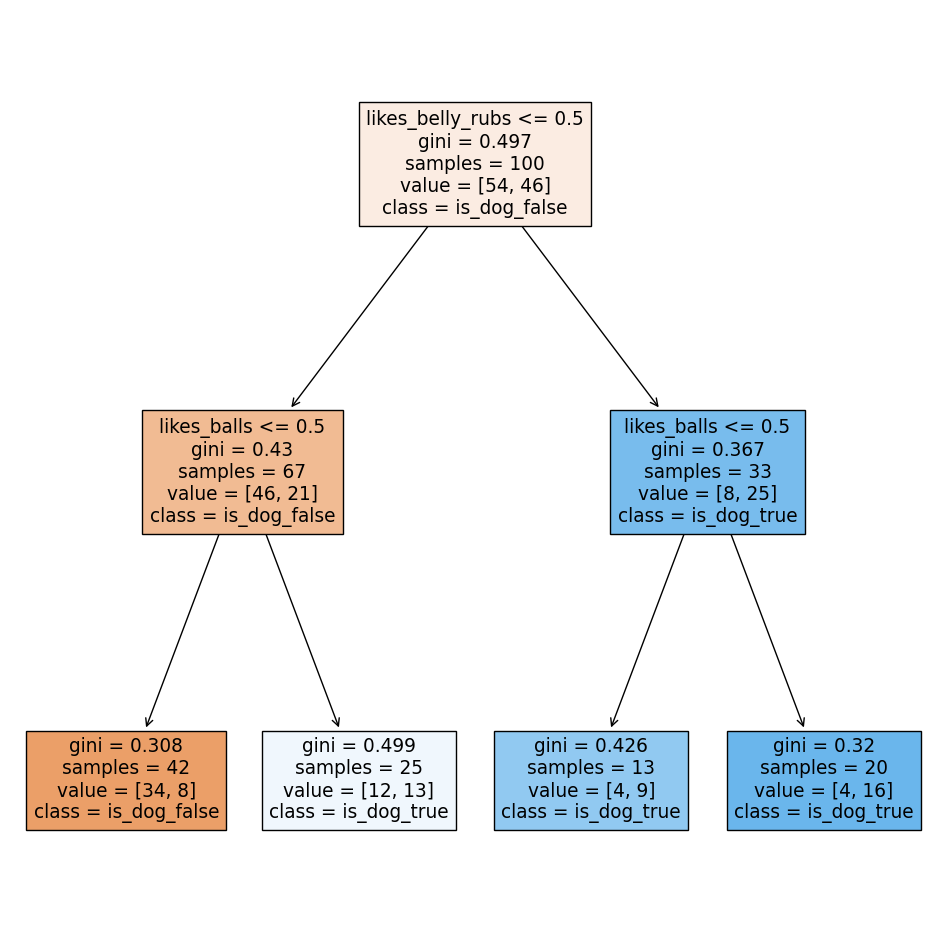

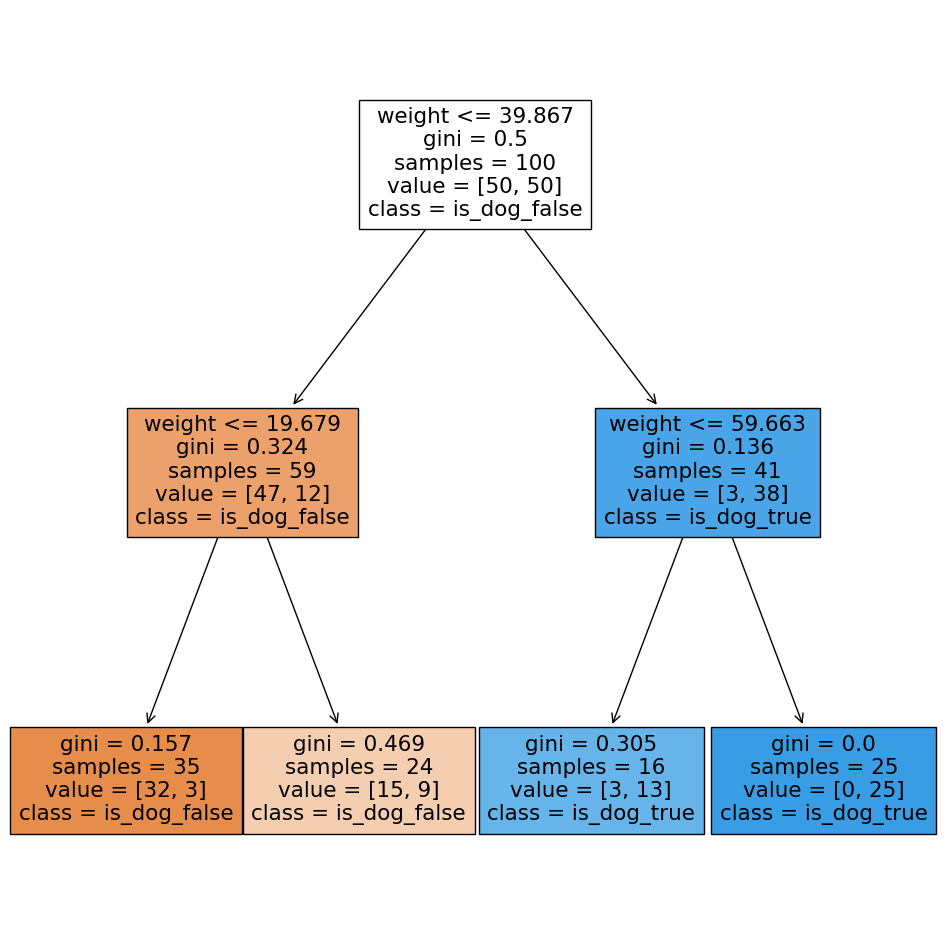

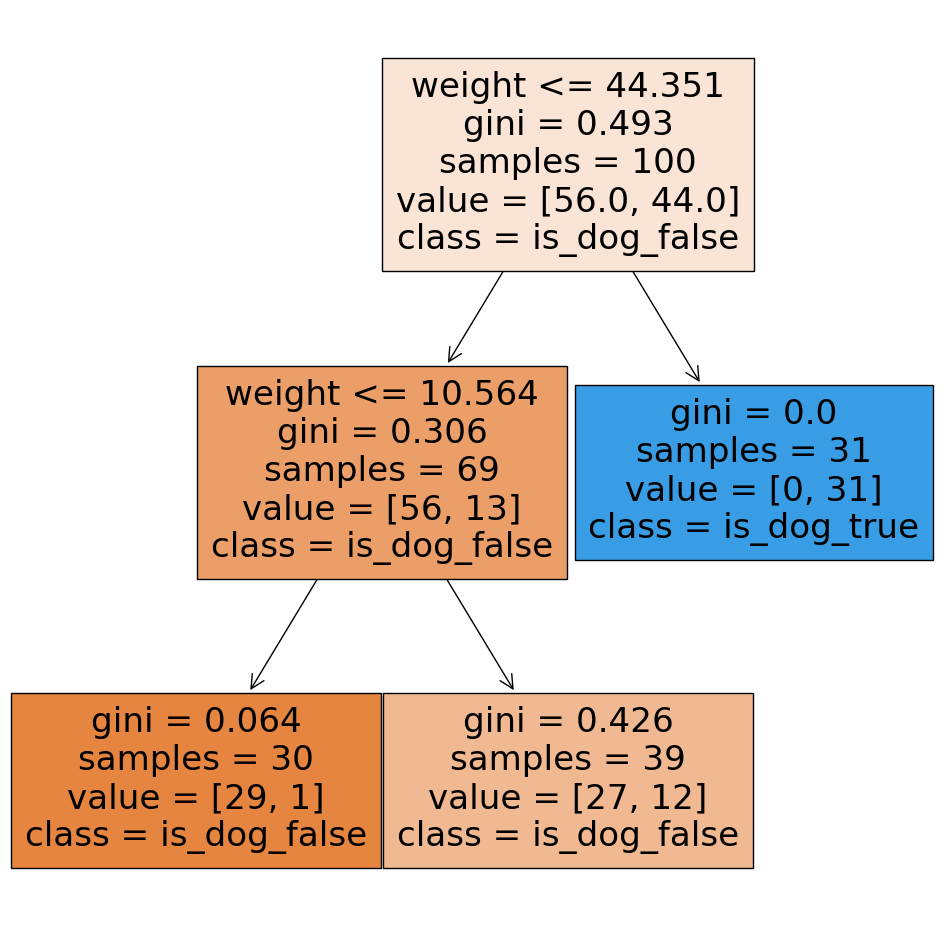

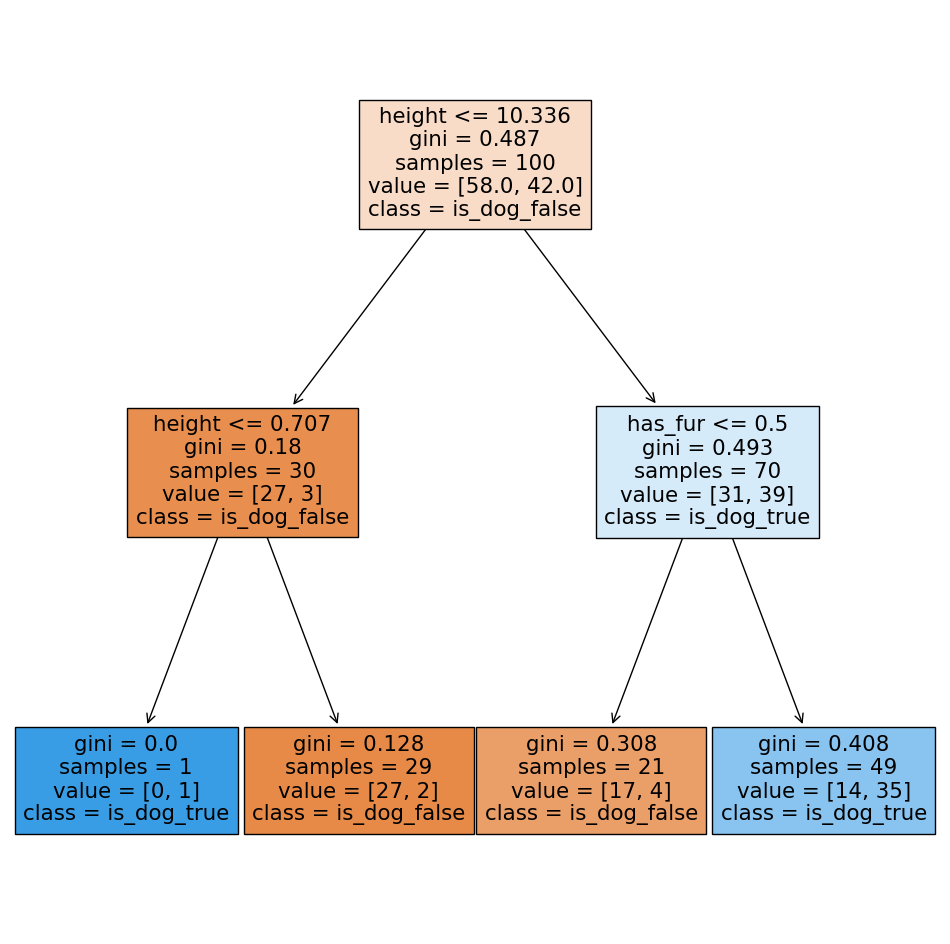

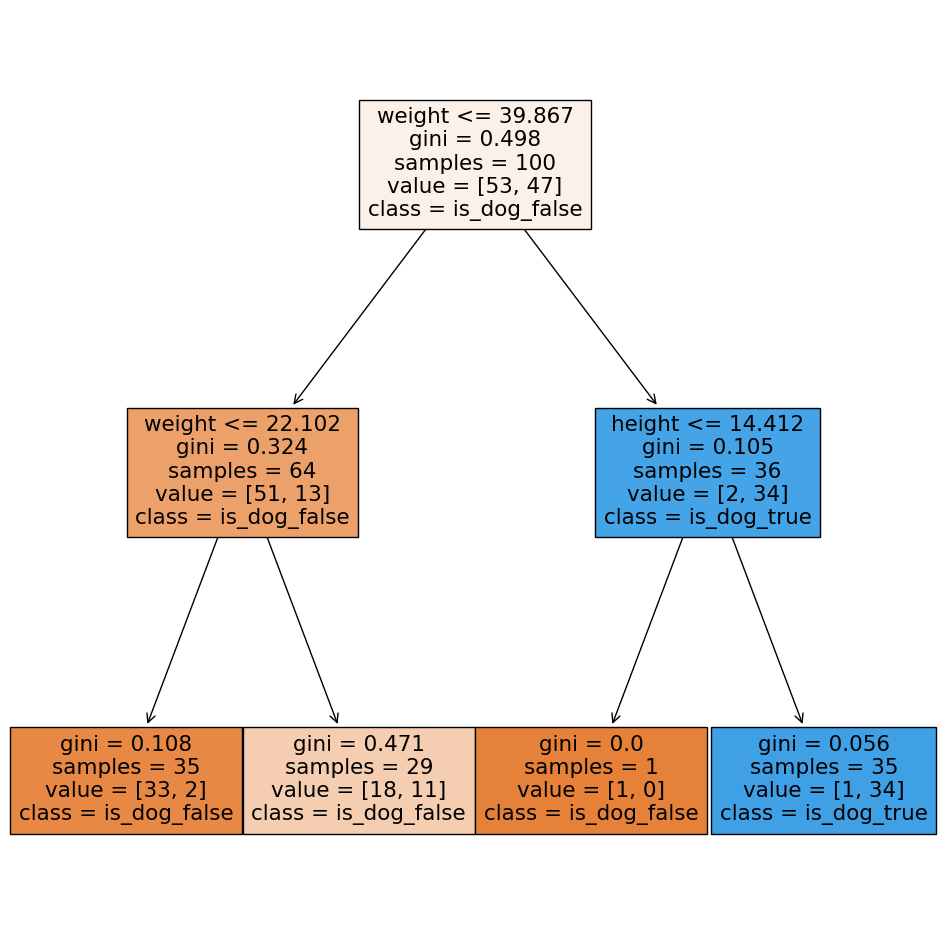

In [3]:
for i in range(10):
    create_tree_and_save(i)